# Sentinel-2 Water Quality Example

### This Notebook is under devleopment. 

## Initialise

In [35]:
%matplotlib inline

import datacube
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

dc = datacube.Datacube(app='waterquality-example')

## Set up datacube query

In [37]:
query = {}
query['product'] = 's2_esa_sr_granule'  # for this example we will load some data from Landsat 8
query['output_crs'] = 'EPSG:3460'  # let's output our data in the Fiji projection
query['group_by'] = 'solar_day'  # datasets can often overlap, we will combine all data that occurs on the same day

## Define Time of Interest

In [43]:
# Time does not need to be set, if you want to do a full time search (NOT recommended!)
# You can specifcy a specific day:
# query['time'] = '2011-10-15'
# or can be expressed as a range:
# query['time'] = ('2011-11-14','2011-11-16')
# time can be formatted as either '20111015' or '2011-10-15'
query['time'] = ('2019-01-13', '2019-01-30')
print('done')

done


## Define Area of Interest


In [44]:
# Similar to to time, a spatial area of interest does not need to be set (NOT recommended!)
# You can specify a specific Sentinel 2 MGRS location using region code:
# query['region_code']='089079'
# alternatively you can create a bounding box, to do this you need three parameters:
#query['x'] = (177.9998, 179.0434)
#query['y'] = (-19.0809, -18.0857)
query['x'] = (178.2819, 178.6019)
query['y'] = (-18.2316, -18.0516)
#query['crs'] = 'EPSG:3460'

## Load and Visualise Area of interest

In [45]:
full_resolution = dc.load(
    resolution = (-10, 10), # this is the 'native' or 'full' resolution of Sentinel-2 data
    measurements=['red','green','blue','scene_classification'], # for this example we will also retrieve the 'scene_classification' band
    **query #use the query we defined above
)

/opt/conda/envs/cubeenv/lib/python3.6/site-packages/xarray/plot/facetgrid.py:288: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


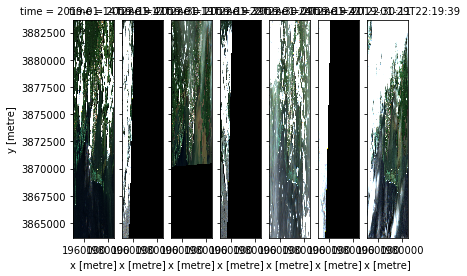

In [46]:
# Plot as cloudy RGB image
full_resolution[['red','green','blue']].to_array().plot.imshow(
    col='time',
    figsize=(6, 4),
    vmin=0,
    vmax=3000
);


In [71]:
# Identify pixels with valid data:
good_quality = (
    (full_resolution.scene_classification != 0) & # mask out NO_DATA
    (full_resolution.scene_classification != 1) & # mask out SATURATED_OR_DEFECTIVE
    (full_resolution.scene_classification != 2) & # mask out NO_DATA
    (full_resolution.scene_classification != 3) & # mask out CLOUD_SHADOWS
    (full_resolution.scene_classification != 4) & # mask out NO_DATA
    (full_resolution.scene_classification != 5) & # mask out NO_DATA
    (full_resolution.scene_classification != 7) & # mask out NO_DATA
    (full_resolution.scene_classification != 8) & # mask out CLOUD_MEDIUM_PROBABILITY
    (full_resolution.scene_classification != 9) & # mask out CLOUD_HIGH_PROBABILITY
    (full_resolution.scene_classification != 10) & # mask out THIN_CIRRUS
    (full_resolution.scene_classification != 11)  # mask out NO_DATA
)

In [72]:
# Apply mask
full_resolution = full_resolution.where(good_quality)

/opt/conda/envs/cubeenv/lib/python3.6/site-packages/xarray/plot/facetgrid.py:288: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


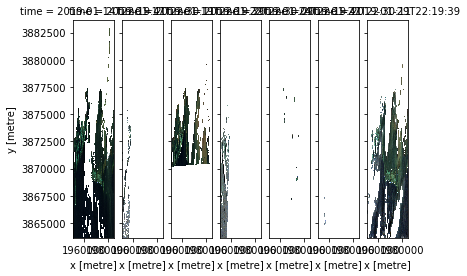

In [73]:
# Plot as cloud free RGB image
full_resolution[['red','green','blue']].to_array().plot.imshow(
    col='time',
    figsize=(6, 4),
    vmin=0,
    vmax=3000
);

In [74]:
red = full_resolution['red']
green = full_resolution['green']
print('done')

done


## NDTI I

From this paper - based in UAE - arid environment. 
https://www.sciencedirect.com/science/article/pii/S2352938518303069

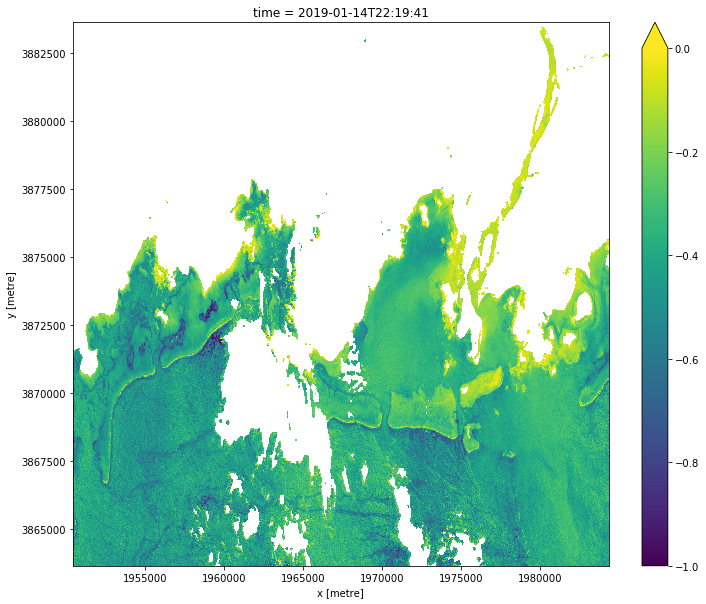

In [79]:
NSI = np.divide((red-green), (red+green))
NSI.isel(time=0).plot(figsize = (12, 10), vmin = -1, vmax = 0)

0.5
